In [28]:
from fastai.vision.all import *
from tqdm import tqdm_notebook as tqdm

In [20]:
import torch
print(torch.cuda.is_available())

True


In [29]:
data = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(valid_pct=0.2, seed=42),
                 get_y=parent_label,
                 item_tfms=Resize(224),
                 batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)])

data = data.dataloaders(source="data/raw_data/")

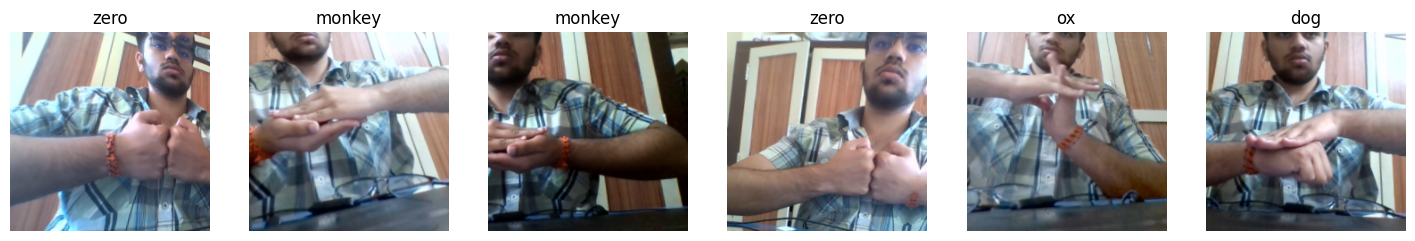

In [30]:
data.train.show_batch(max_n=6, nrows=1)

In [32]:
from fastai.metrics import error_rate

learn = vision_learner(data, models.vgg16_bn , metrics=[accuracy, error_rate])

In [24]:
learn.lr_find()

KeyboardInterrupt: 

In [14]:
learn.recorder.plot()

AttributeError: 'Sequential' object has no attribute 'plot'

In [33]:
learn.fit_one_cycle(4,1e-2)

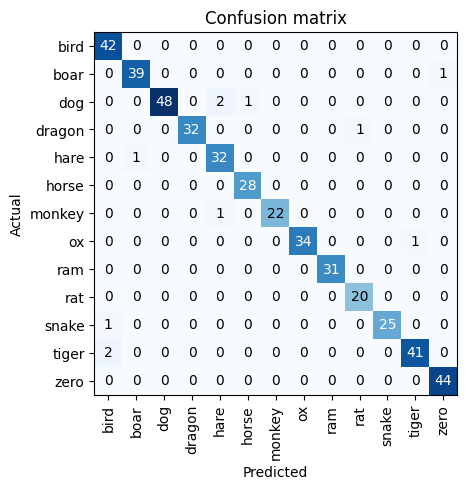

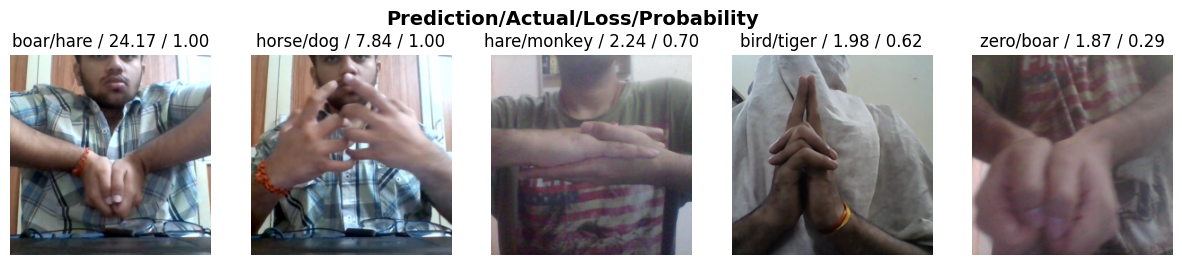

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=1)

In [47]:
learn.export('model/fastai-v1.pth')

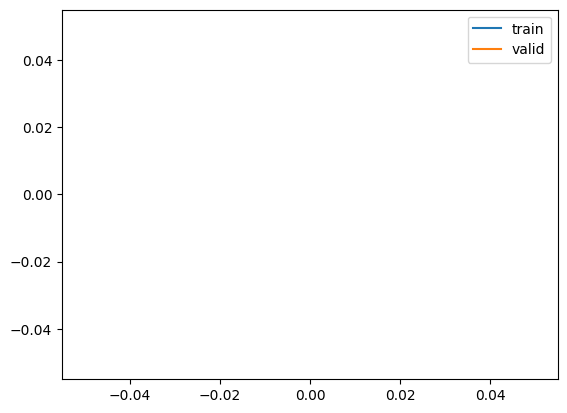

In [39]:
learn.recorder.plot_loss()

In [41]:
model_path = "models/fastai-v1.pth"
learn_loaded = load_learner(model_path)

AttributeError: 'dict' object has no attribute 'dls'